### Implementation of Artificial Neural Network


### Part-1
This part will contain the basic data pre-processing and scaling the features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
# Checking for null values in the dataset.
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Splitting our dataset into Features and Target datasets:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
# Since there are a few categorical features, we will create dummy variables for them.
# Later, we will concatenate them, and drop the original categorical features.
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

# Concatenating the datasets:
X = pd.concat([X, geography, gender], axis=1)

# Dropping the original categorical features
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
X.shape

(10000, 11)

In [10]:
# Splitting the dataset into training and testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
# Feature Scaling: We do Feature Scaling here because it'll be easy for the device when
# it does calculations for the Neural Network.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Part-2
This part will contain the creation of Artificial Neural Network.

In [12]:
# Importing the necessary Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense # Used to create the layers.
from keras.layers import LeakyReLU, PReLU, ELU # Activation functions
from keras.layers import Dropout # Regulization parameter: Helps to prevent overfitting.

In [13]:
# Initializing the ANN
classifier = Sequential()

In [14]:
# Creating the input layer and the first hidden layer:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))
# Hence, the input layer has 11 input nodes (because there are 11 features in the dataset.), and 6 hidden layer nodes.
# With ReLu as our activation function, it's preferrable to use "he_uniform" with it.

In [15]:
# Adding the second hidden layer:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [16]:
# Adding the output layer:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [17]:
# Compiling the ANN:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # For binary classification problems, 
                                                                                             # it's preferrable to use binary-crossentropy.

In [18]:
# Fitting the ANN to the training set:
modelHistory = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7912 - val_loss: 0.4735 - val_accuracy: 0.8020
Epoch 2/100
536/536 [==============================] - 0s 819us/step - loss: 0.4667 - accuracy: 0.8050 - val_loss: 0.4480 - val_accuracy: 0.8084
Epoch 3/100
536/536 [==============================] - 0s 805us/step - loss: 0.4435 - accuracy: 0.8115 - val_loss: 0.4353 - val_accuracy: 0.8084
Epoch 4/100
536/536 [==============================] - 0s 791us/step - loss: 0.4300 - accuracy: 0.8136 - val_loss: 0.4217 - val_accuracy: 0.8103
Epoch 5/100
536/536 [==============================] - 0s 800us/step - loss: 0.4173 - accuracy: 0.8151 - val_loss: 0.4106 - val_accuracy: 0.8118
Epoch 6/100
536/536 [==============================] - 0s 865us/step - loss: 0.4043 - accuracy: 0.8268 - val_loss: 0.3936 - val_accuracy: 0.8232
Epoch 7/100
536/536 [==============================] - 0s 831us/step - loss: 0.3902 - accuracy: 0.8377 - val_loss: 0.3814 - val_accu

536/536 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8649 - val_loss: 0.3520 - val_accuracy: 0.8523
Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8619 - val_loss: 0.3499 - val_accuracy: 0.8516
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3341 - accuracy: 0.8634 - val_loss: 0.3496 - val_accuracy: 0.8535
Epoch 60/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8640 - val_loss: 0.3508 - val_accuracy: 0.8535
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3343 - accuracy: 0.8632 - val_loss: 0.3502 - val_accuracy: 0.8550
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8625 - val_loss: 0.3478 - val_accuracy: 0.8538
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3334 - accuracy: 0.8632 - val_loss: 0.3491 - val_accuracy: 0.8504
Epoch

In [19]:
# Making Predictions:
yPredictions = classifier.predict(X_test)
yPredictions = (yPredictions > 0.5)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(y_test, yPredictions))
print(confusion_matrix(y_test, yPredictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.79      0.51      0.62       423

    accuracy                           0.87      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

[[1520   57]
 [ 206  217]]


### Printing the metrics regarding Deep Learning:

In [22]:
print(modelHistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


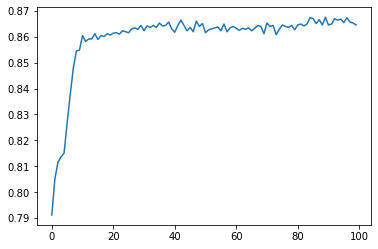

In [24]:
# Plot showing the accuracy after each epoc:
plt.plot(modelHistory.history['accuracy'])

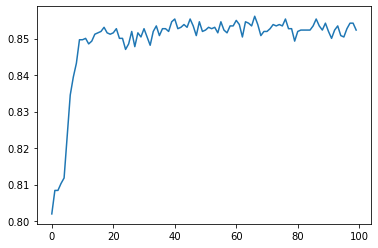

In [25]:
# Plot showing the accuracy of validation set:
plt.plot(modelHistory.history['val_accuracy'])

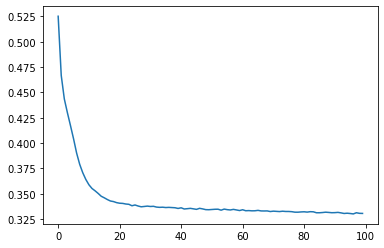

In [29]:
# Plot showing loss after each epoc:
plt.plot(modelHistory.history['loss'])

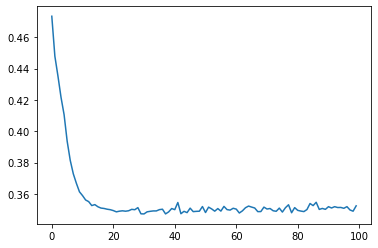

In [30]:
# Plot showing Validation loss after each epoc:
plt.plot(modelHistory.history['val_loss'])